#### Study to look for patterns for endangered species in national parks

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) Loading datasets

In [29]:
observations = pd.read_csv("observations.csv")

species_info = pd.read_csv("species_info.csv")

#### 2) sample of datasets

In [31]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [32]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


#### 3) Summary and counts of datasets.

In [50]:
print(observations.describe())
print("\n")
print(observations.isna().sum())
print("\n")
print(observations.shape)

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


scientific_name    0
park_name          0
observations       0
dtype: int64


(23296, 3)


In [53]:
print(species_info.describe())
print("\n")
print(species_info.isna().sum())
print("\n")
print(species_info.shape)

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


(5824, 4)


#### 4) Uniqueness

In [36]:
print(observations.park_name.unique().tolist())

['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']


In [39]:
print(species_info.category.unique().tolist())

['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']


In [41]:
print(species_info.conservation_status.unique().tolist())

[nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


In [57]:
print(species_info.scientific_name.unique().tolist())

['Clethrionomys gapperi gapperi', 'Bos bison', 'Bos taurus', 'Ovis aries', 'Cervus elaphus', 'Odocoileus virginianus', 'Sus scrofa', 'Canis latrans', 'Canis lupus', 'Canis rufus', 'Urocyon cinereoargenteus', 'Vulpes fulva', 'Vulpes vulpes', 'Felis concolor', 'Felis silvestris', 'Lynx rufus', 'Puma concolor', 'Mephitis mephitis', 'Spilogale putorius', 'Lontra canadensis', 'Lutra canadensis', 'Martes pennanti', 'Mustela', 'Mustela frenata', 'Mustela nivalis', 'Mustela vison', 'Procyon lotor', 'Ursus americanus', 'Corynorhinus rafinesquii', 'Eptesicus fuscus', 'Lasionycteris noctivagans', 'Lasiurus borealis', 'Lasiurus cinereus', 'Myotis austroriparius', 'Myotis grisescens', 'Myotis keenii', 'Myotis leibii', 'Myotis lucifugus', 'Myotis septentrionalis', 'Myotis sodalis', 'Nycticeius humeralis', 'Pipistrellus subflavus', 'Didelphis virginiana', 'Lepus americanus', 'Sylvilagus floridanus', 'Sylvilagus obscurus', 'Sylvilagus transitionalis', 'Equus caballus', 'Homo sapiens', 'Castor canadens

#### 5) Cleaning nan values from species_info dataframe

In [56]:
species_info_nona = species_info.dropna()

In [65]:
print(species_info_nona.columns)
print("\n")
print(species_info_nona.shape)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


(191, 4)


#### 6) Plotting some insights about conservation status vs category

<AxesSubplot:xlabel='conservation_status', ylabel='count'>

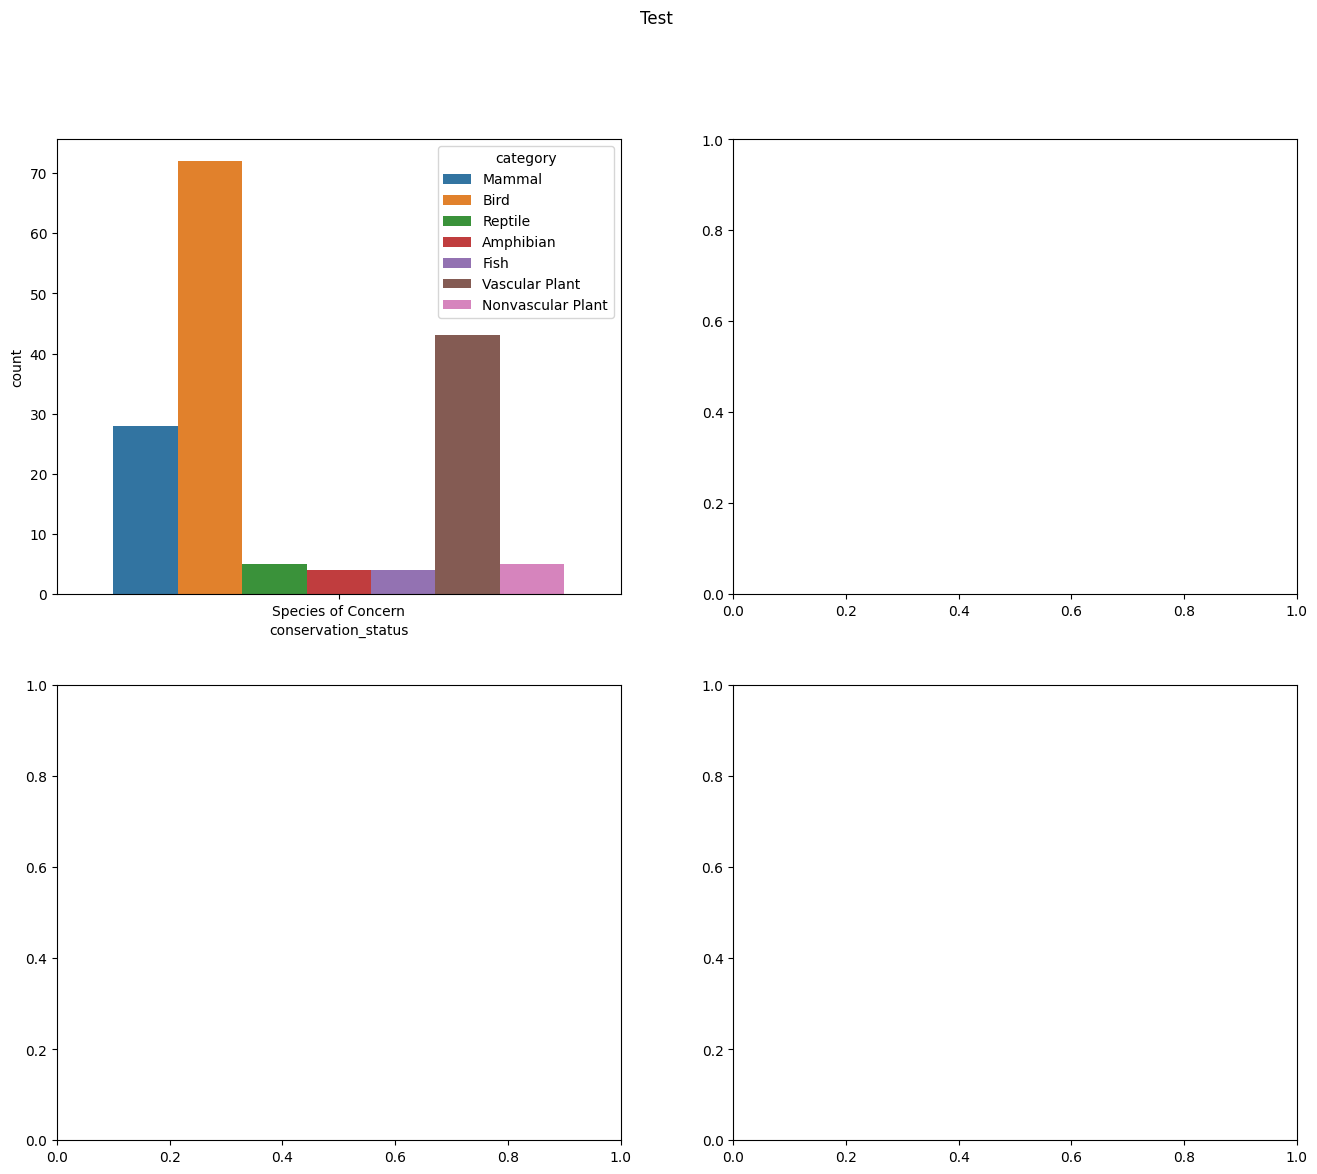

In [81]:
fig, axs = plt.subplots(2, 2, sharex=False, figsize=(16,13))

fig.suptitle('Test')

sns.countplot(ax = axs[0,0], x="conservation_status", data = species_info_nona[species_info_nona["conservation_status"]=="Species of Concern"], hue = "category")



<AxesSubplot:xlabel='conservation_status', ylabel='count'>

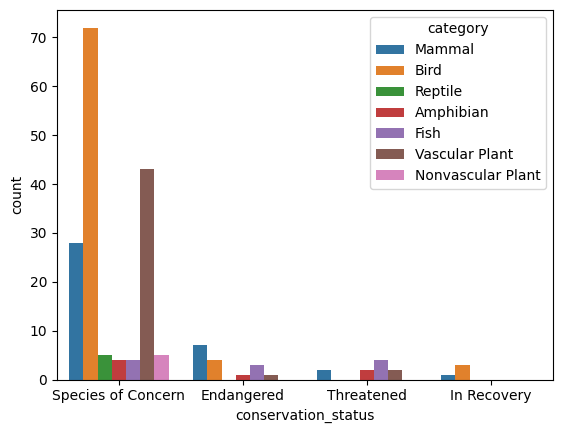

In [72]:
sns.countplot(x="conservation_status", data = species_info_nona, hue = "category")

In [ ]:
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)